# Set up: Load Libraries, Images, Atlases, Patient Data

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sk

import nibabel as nib

In [3]:
# load csv file containing neuropsych data
df_neuropsych = pd.read_csv('/home/forest/OneDrive/CLMS_OTHER_DATA/CLMS_Neuropsych_rev1_20220404.csv')

In [4]:
df_neuropsych.columns

Index(['Unnamed: 0', 'CASE$', 'COG_DATE', 'SUBJECT_ID$', 'SEX$', 'BIRTH_DATE',
       'GROUP$', 'MS_TYPE$', 'ONSET_DATE', 'CLIN_DATE',
       ...
       'PAS2_Z_SD', 'PAS2_Z_SCO', 'EDSS', 'FSS_VISUAL', 'FSS_BRSTEM',
       'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY', 'FSS_BOWBLAD',
       'FSS_CEREBRAL'],
      dtype='object', length=111)

In [2]:
# load freesurfer cortical thickness data


In [3]:
# load preprocessed fMRI data (final nifti files, filepath only)

In [4]:
# combine everything into one dataframe

In [5]:
# load regions of interest from atlas

In [12]:
pd.set_option('display.max_columns', None)
df_neuropsych.head(5)

,Unnamed: 0,CASE$,COG_DATE,SUBJECT_ID$,SEX$,BIRTH_DATE,GROUP$,MS_TYPE$,ONSET_DATE,CLIN_DATE,BIRTHDATE,AGE_YRS,EDU_YRS,HEIGHT_CM,WEIGHT_KG,HANDED$,DEGREE$,HAND_SCORE,DOM_SEQ_TOT1,DOM_SEQ_ERR1,DOM_SEQ_COR1,NON_SEQ_TOT1,NON_SEQ_ERR1,NON_SEQ_COR1,BI_IN_TOT1,BI_IN_TOT1.1,BI_IN_COR1,BI_OUT_TOT1,BI_OUT_TOT1.1,BI_OUT_COR1,NON_SEQ_TOT2,NON_SEQ_ERR2,NON_SEQ_COR2,DOM_SEQ_TOT2,DOM_SEQ_ERR2,DOM_SEQ_COR2,BI_IN_TOT2,BI_IN_ERR2,BI_IN_COR2,BI_OUT_TOT2,BI_OUT_ERR2,BI_OUT_COR2,SING_RT_TOT,SING_LT_TOT,LT_MEA_COR,LT_TOT_ERR,RT_MEA_COR,RT_TOT_ERR,IN_MEA_COR,OUT_MEA_COR,SDM_COR,SDM_Z_MEA,SDM_Z_SD,SDM_Z_SCO,DSC_TOT_COR,DSC_TOT_ERR,DSC_TOT_SCO,DSC_SS,SYS_TOT_COR,SYS_TOT_ERR,SYS_TOT_SCO,SYS_SS,DSC_SYS_SS,PSI_SCO,PSI_PCT,MFIS_TEST,MFIS_TOT,MFIS_PHY,MFIS_COG,MFIS_PSY,MAR_STATUS$,OCCUPATION$,BDI_TOT_SCO,BDI_CLASS$,TOL_COR_SCO,TOL_MOV_SCO,TOL_INI_TIM,TOL_EXE_TIM,TOL_TOT_TIM,TOL_TIM_VIO,TOL_TY1_VIO,TOL_TY2_VIO,TOL_TOT_VIO,TOL_STB_VIO,TOL_MOV_SS,TOL_COR_SS,TOL_RUV_SS,TOL_TIV_SS,TOL_INT_SS,TOL_EXT_SS,TOL_PRS_SS,AVERAGE,PAS_FORM$,PAS3_TOT_COR,PAS3_PCT_COR,PAS3_Z_MEA,PAS3_Z_SD,PAS3_Z_SCO,PAS2_TOT_COR,PAS2_PCT_COR,PAS2_Z_MEA,PAS2_Z_SD,PAS2_Z_SCO,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
0,0,ABC-001,2015-11-04 00:00:00,abc_001,Male,1967-03-08 00:00:00,MS,SPMS,2017-08-01 00:00:00,2015-11-04 00:00:00,1967-03-08 00:00:00,48.659822,14,177,79,Left,Strongly,77,145,1,144,106,5,101,96,69,27,28,3,25,115,1,114,77,0,77,91,56,35,42,3,39,214,199,111.0,1,110.5,6,31.0,32.0,56,58.31,8.67,-0.266436,68,0,68,10,29,1,28,9,19,96,39,1,41,27,11,3,Engaged,Fire Chief,14,Mild,5,30,144,215,359,2,0,0,0,0,100,106,104,78,134,100,90,101.714286,A,47,78.333333,50.4,9.7,-0.350515,37.0,61.666667,39.4,10.2,-0.235294,3.0,1.0,0.0,2.0,1,2.0,1.0,0.0
1,1,BCD-002,2015-11-23 00:00:00,bcd_002,Female,1969-10-09 00:00:00,MS,SPMS,1995-07-01 00:00:00,2015-11-23 00:00:00,1969-10-09 00:00:00,46.121834,16,152,62,Right,Strongly,18,128,5,123,118,0,118,87,3,84,29,0,29,122,0,122,136,0,136,88,7,81,33,1,32,89,79,120.0,0,132.0,5,82.5,30.5,68,58.31,8.67,1.117647,88,0,88,14,48,0,48,17,31,131,98,1,41,25,11,5,Married,Housemaker,6,Minimal,4,25,25,199,224,1,0,0,0,0,106,100,104,92,92,102,104,100.000000,A,54,90.000000,50.4,9.7,0.371134,33.0,55.000000,39.4,10.2,-0.627451,5.5,1.0,1.0,4.0,3,3.0,2.0,1.0
2,2,CDE-003,2015-11-30 00:00:00,cde_003,Female,1977-09-12 00:00:00,MS,RRMS,2009-07-01 00:00:00,2015-11-30 00:00:00,1977-09-12 00:00:00,38.214921,15,165,102,Right,Strongly,18,141,6,135,119,1,118,101,9,92,29,2,27,108,0,108,144,0,144,108,21,87,42,4,38,93,86,113.5,1,142.5,6,89.5,32.5,61,60.95,11.32,0.004417,84,0,84,12,45,0,45,15,27,120,91,1,21,13,7,1,Blank,Blank,11,Minimal,6,21,65,150,215,0,0,0,0,0,106,108,104,108,104,108,104,106.000000,A,59,98.333333,50.4,9.7,0.886598,50.0,83.333333,39.4,10.2,1.039216,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0
3,3,DEF-004,2015-11-19 00:00:00,def_004,Male,1966-02-05 00:00:00,MS,SPMS,1996-08-15 00:00:00,2015-11-19 00:00:00,1966-02-05 00:00:00,49.785079,14,185,90,Right,Strongly,20,87,0,87,74,0,74,46,0,46,17,0,17,79,0,79,92,0,92,41,1,40,23,0,23,69,62,76.5,0,89.5,0,43.0,20.0,48,58.31,8.67,-1.189158,47,0,47,6,25,0,25,9,15,86,18,1,50,25,21,4,Blank,Blank,8,Minimal,2,47,36,271,307,0,0,0,0,0,86,88,104,108,96,94,96,96.000000,A,54,90.000000,50.4,9.7,0.371134,46.0,76.666667,39.4,10.2,0.647059,6.5,1.0,2.0,5.0,3,3.0,1.0,1.0
4,4,EFG-005,2015-11-26 00:00:00,efg_005,Male,1975-06-13 00:00:00,MS,SPMS,2010-07-01 00:00:00,2015-11-26 00:00:00,1975-06-13 00:00:00,40.454483,12,185,88,Left,Moderately,50,81,3,78,55,1,54,41,4,37,26,4,22,50,0,50,78,1,77,40,8,32,29,1,28,57,76,79.5,4,52.5,1,34.5,25.0,46,59.87,10.49,-1.322212,45,0,45,5,30,1,29,9,14,84,14,1,45,23,17,5,Married,Sheet Metal?,12,Minimal,2,26,46,177,223,0,0,0,0,0,104,88,104,108,98,106,106,102.000000,A,16,26.666667,46.7,9.1,-3.373626,0.0,0.000000,35.1,9.6,-3.656250,4.0,0.0,1.0,3.0,2,2.0,1.0,0.0


# Neuropsych & Structural Data Statistics

In [7]:
# all-group metrics
order=['HC', 'RRMS', 'SPMS']
palette = ['#009ADE', '#FFC61E', '#E9002D']
data=df_neuropsych

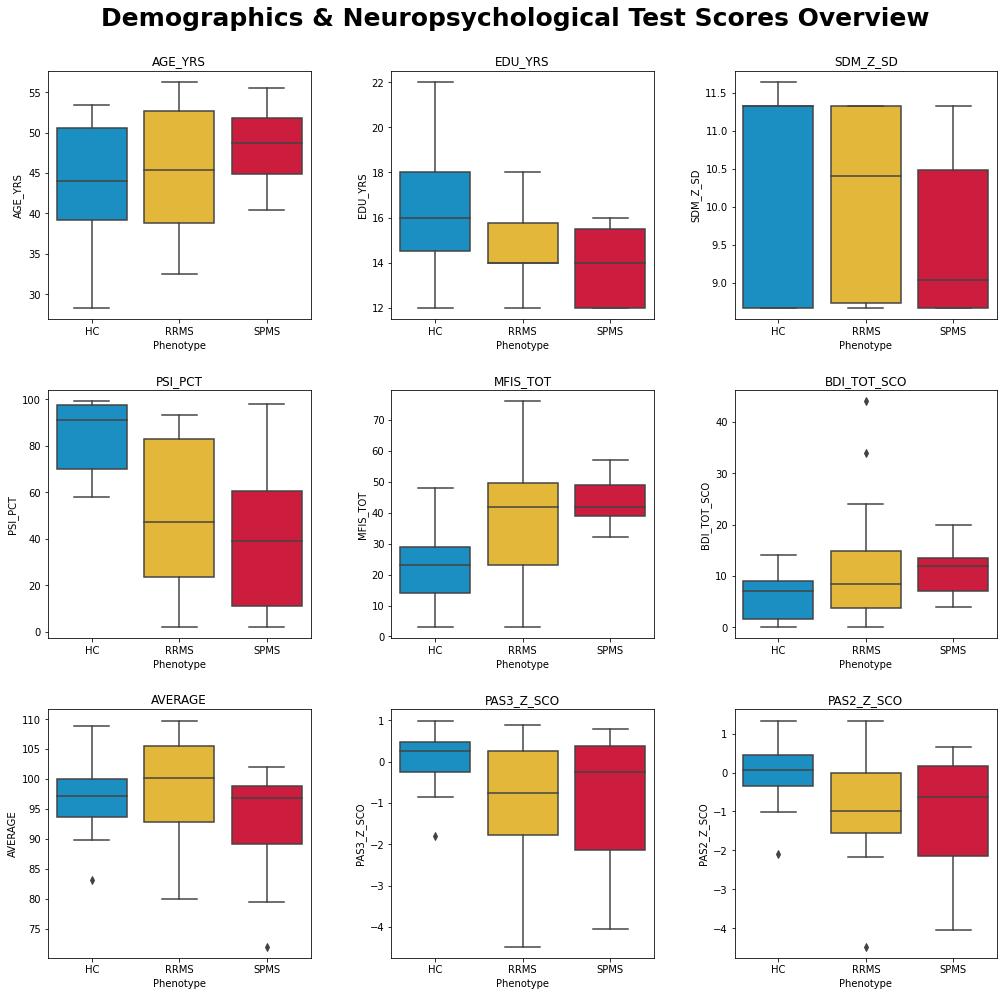

In [13]:
# define columns to be plotted
metrics = ['AGE_YRS', 'EDU_YRS', 'SDM_Z_SD', 'PSI_PCT', 'MFIS_TOT', 'BDI_TOT_SCO', 'AVERAGE', 'PAS3_Z_SCO', 'PAS2_Z_SCO']

fig, ax = plt.subplots(3, 3, figsize=(15, 14))
fig.tight_layout(pad=5)
fig.suptitle('Demographics & Neuropsychological Test Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(metrics)):
    sns.boxplot(ax=ax[i], x='MS_TYPE$', y=metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(metrics[i])
    ax[i].set_xlabel('Phenotype')


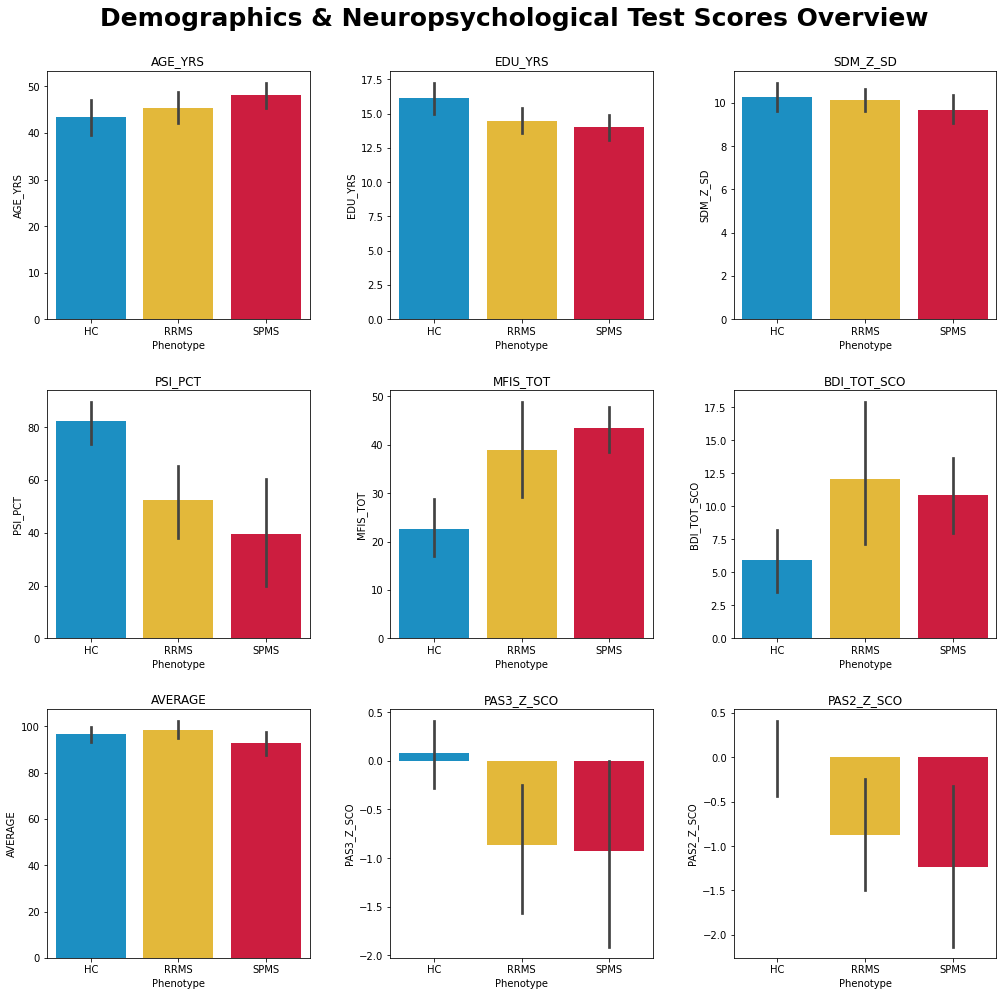

In [14]:
# define columns to be plotted
metrics = ['AGE_YRS', 'EDU_YRS', 'SDM_Z_SD', 'PSI_PCT', 'MFIS_TOT', 'BDI_TOT_SCO', 'AVERAGE', 'PAS3_Z_SCO', 'PAS2_Z_SCO']

fig, ax = plt.subplots(3, 3, figsize=(15, 14))
fig.tight_layout(pad=5)
fig.suptitle('Demographics & Neuropsychological Test Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(metrics[i])
    ax[i].set_xlabel('Phenotype')


In [17]:
# handedness scores
handedness_metrics = [
'HANDED$',
'DEGREE$',
'HAND_SCORE',
'DOM_SEQ_TOT1',
'DOM_SEQ_ERR1',
'DOM_SEQ_COR1',
'NON_SEQ_TOT1',
'NON_SEQ_ERR1',
'NON_SEQ_COR1',
'BI_IN_TOT1',
'BI_IN_TOT1.1',
'BI_IN_COR1',
'BI_OUT_TOT1',
'BI_OUT_TOT1.1',
'BI_OUT_COR1',
'NON_SEQ_TOT2',
'NON_SEQ_ERR2',
'NON_SEQ_COR2',
'DOM_SEQ_TOT2',
'DOM_SEQ_ERR2',
'DOM_SEQ_COR2',
'BI_IN_TOT2',
'BI_IN_ERR2',
'BI_IN_COR2',
'BI_OUT_TOT2',
'BI_OUT_ERR2',
'BI_OUT_COR2',
'SING_RT_TOT',
'SING_LT_TOT',
'LT_MEA_COR',
'LT_TOT_ERR',
'RT_MEA_COR',
'RT_TOT_ERR',
'IN_MEA_COR',
'OUT_MEA_COR']

In [23]:
df_neuropsych[handedness_metrics[2]].dtype

dtype('int64')

In [24]:
# get data types for each of these columns
for col in handedness_metrics:
    print(df_neuropsych[col].dtypes)

object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
float64
int64
float64
float64


Plot for HANDED$ TBD...
Plot for DEGREE$ TBD...


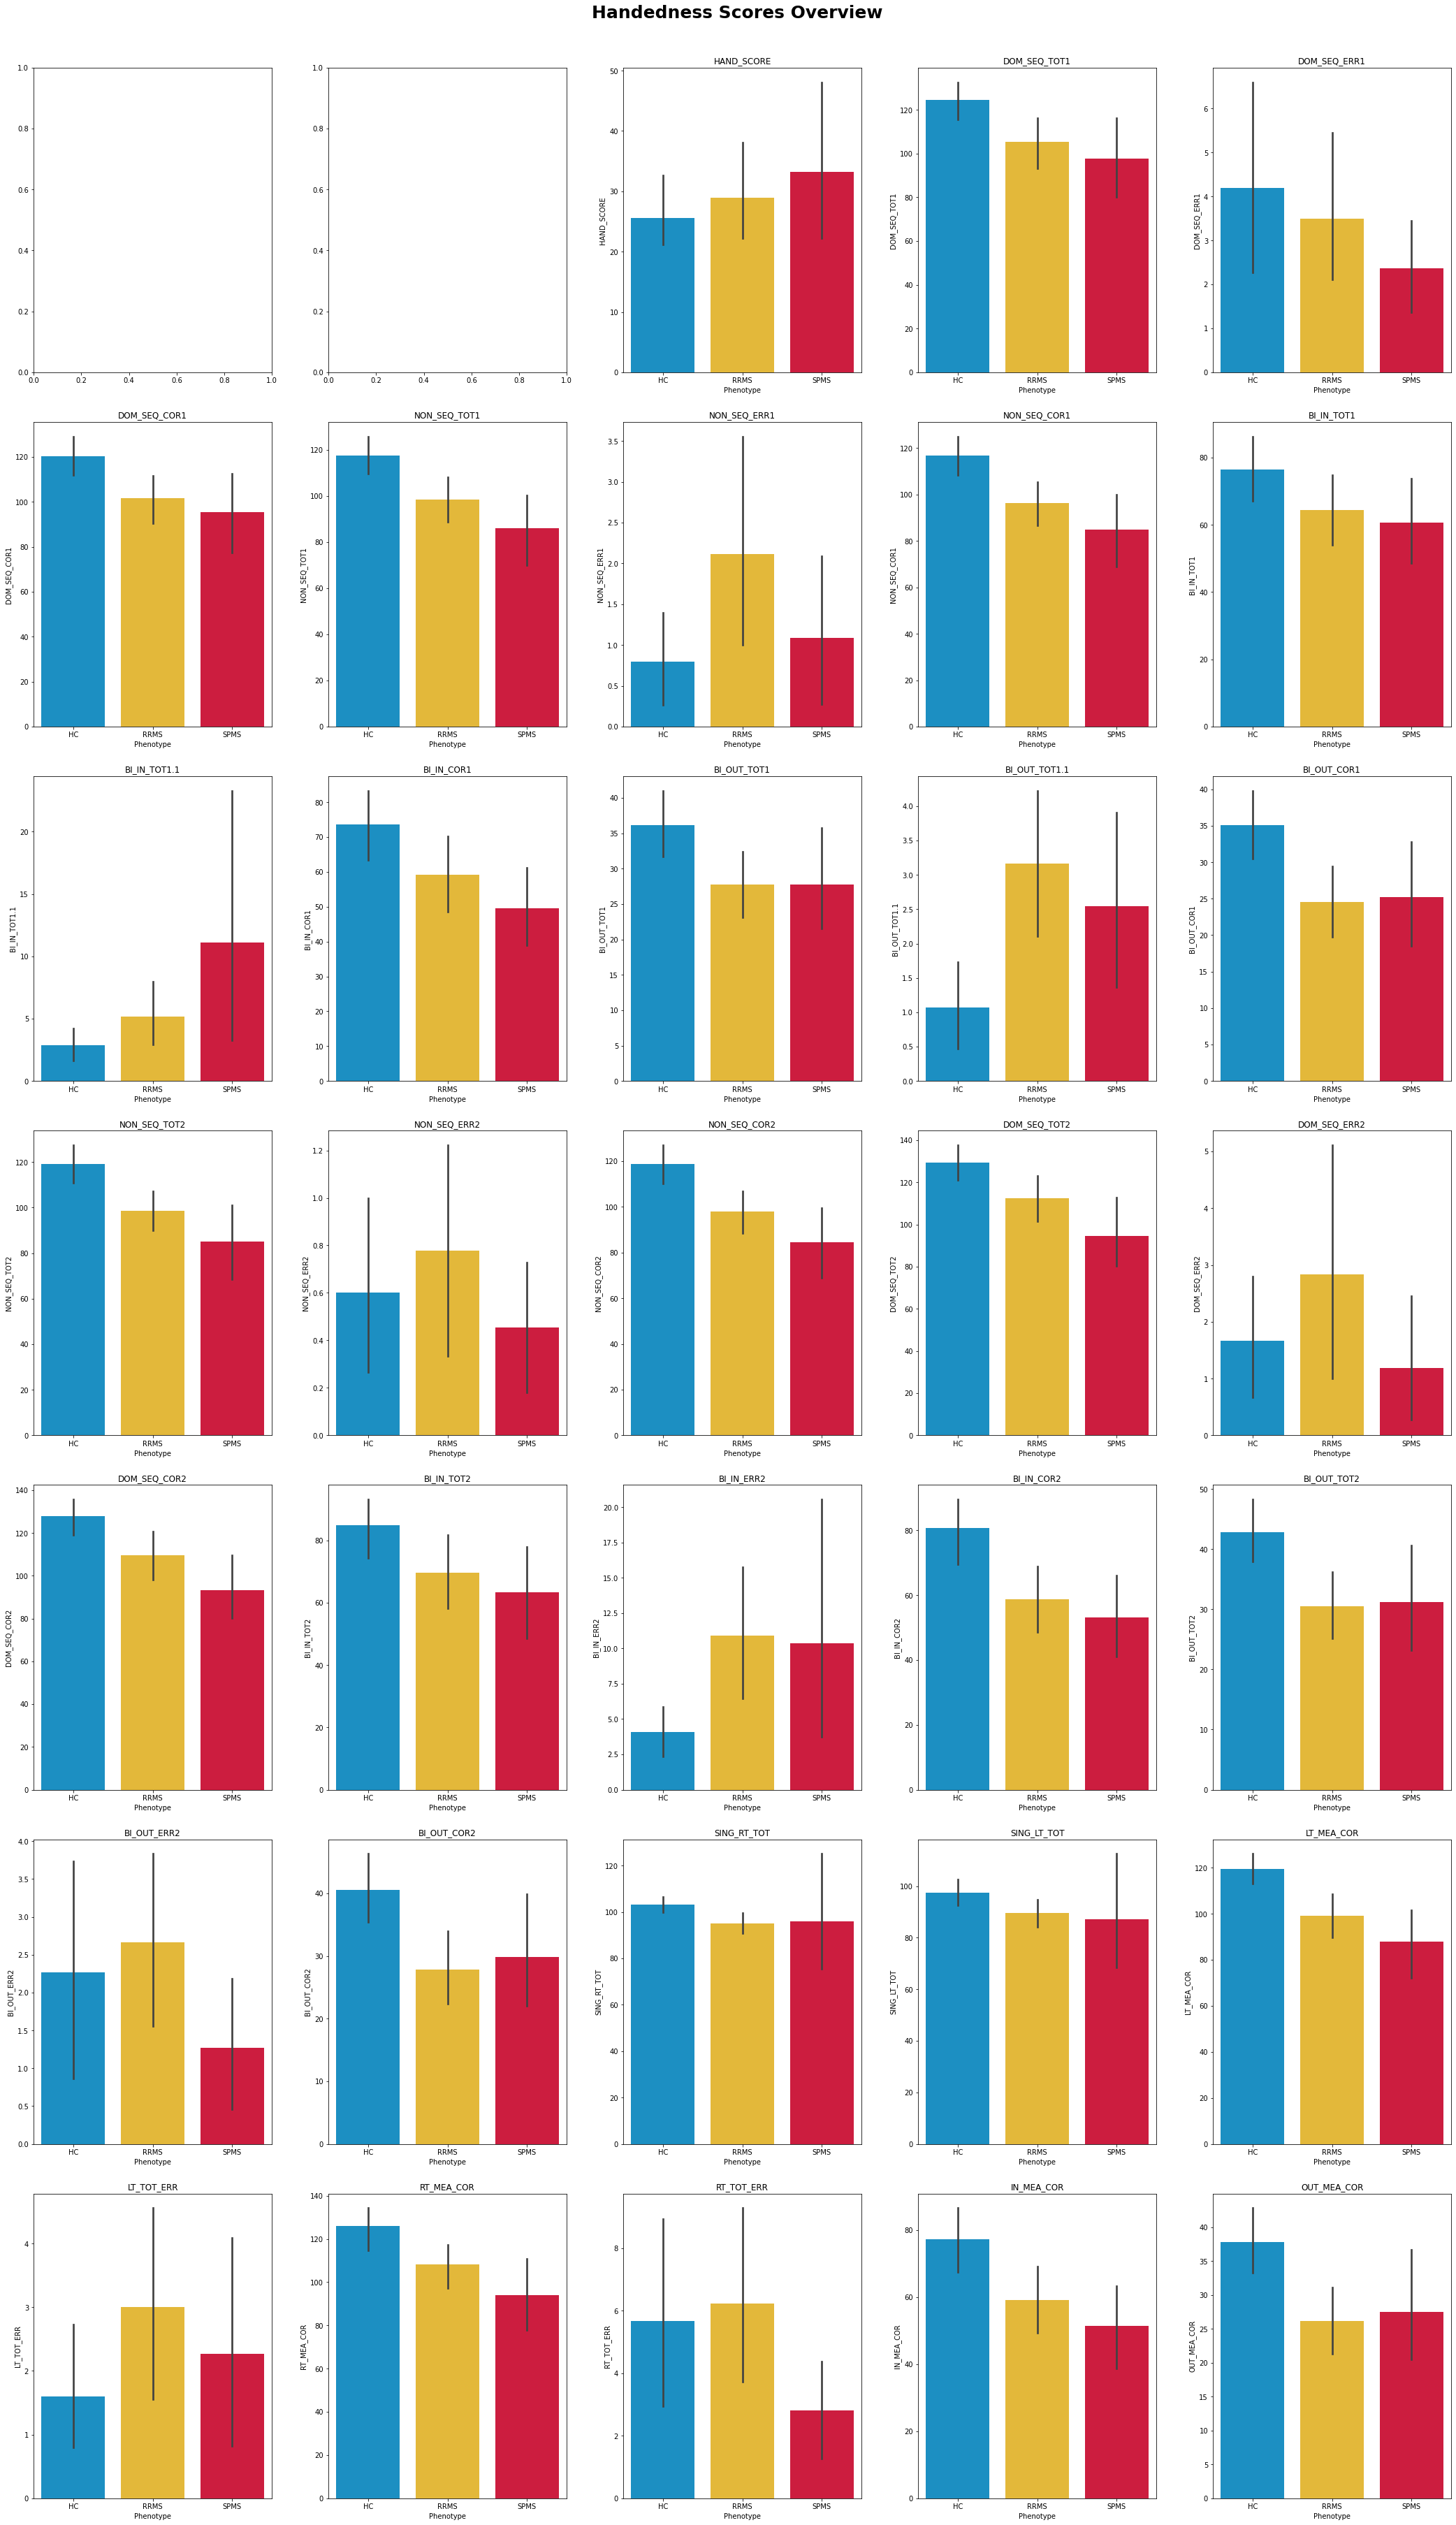

In [34]:
fig, ax = plt.subplots(7,5, figsize=(30, 50))
fig.tight_layout(pad=5)
fig.suptitle('Handedness Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(handedness_metrics)):

       # if column is categorical, use bar chart
       if df_neuropsych[handedness_metrics[i]].dtypes == 'object':
              #sns.boxplot(ax=ax[i], x='MS_TYPE$', y=handedness_metrics[i], data=df_neuropsych, order=order, palette=palette)
              print(f'Plot for {handedness_metrics[i]} TBD...')

       # else, use barplot
       else: 
              sns.barplot(ax=ax[i], x='MS_TYPE$', y=handedness_metrics[i], data=df_neuropsych, order=order, palette=palette)
              ax[i].set_title(handedness_metrics[i])
              ax[i].set_xlabel('Phenotype')


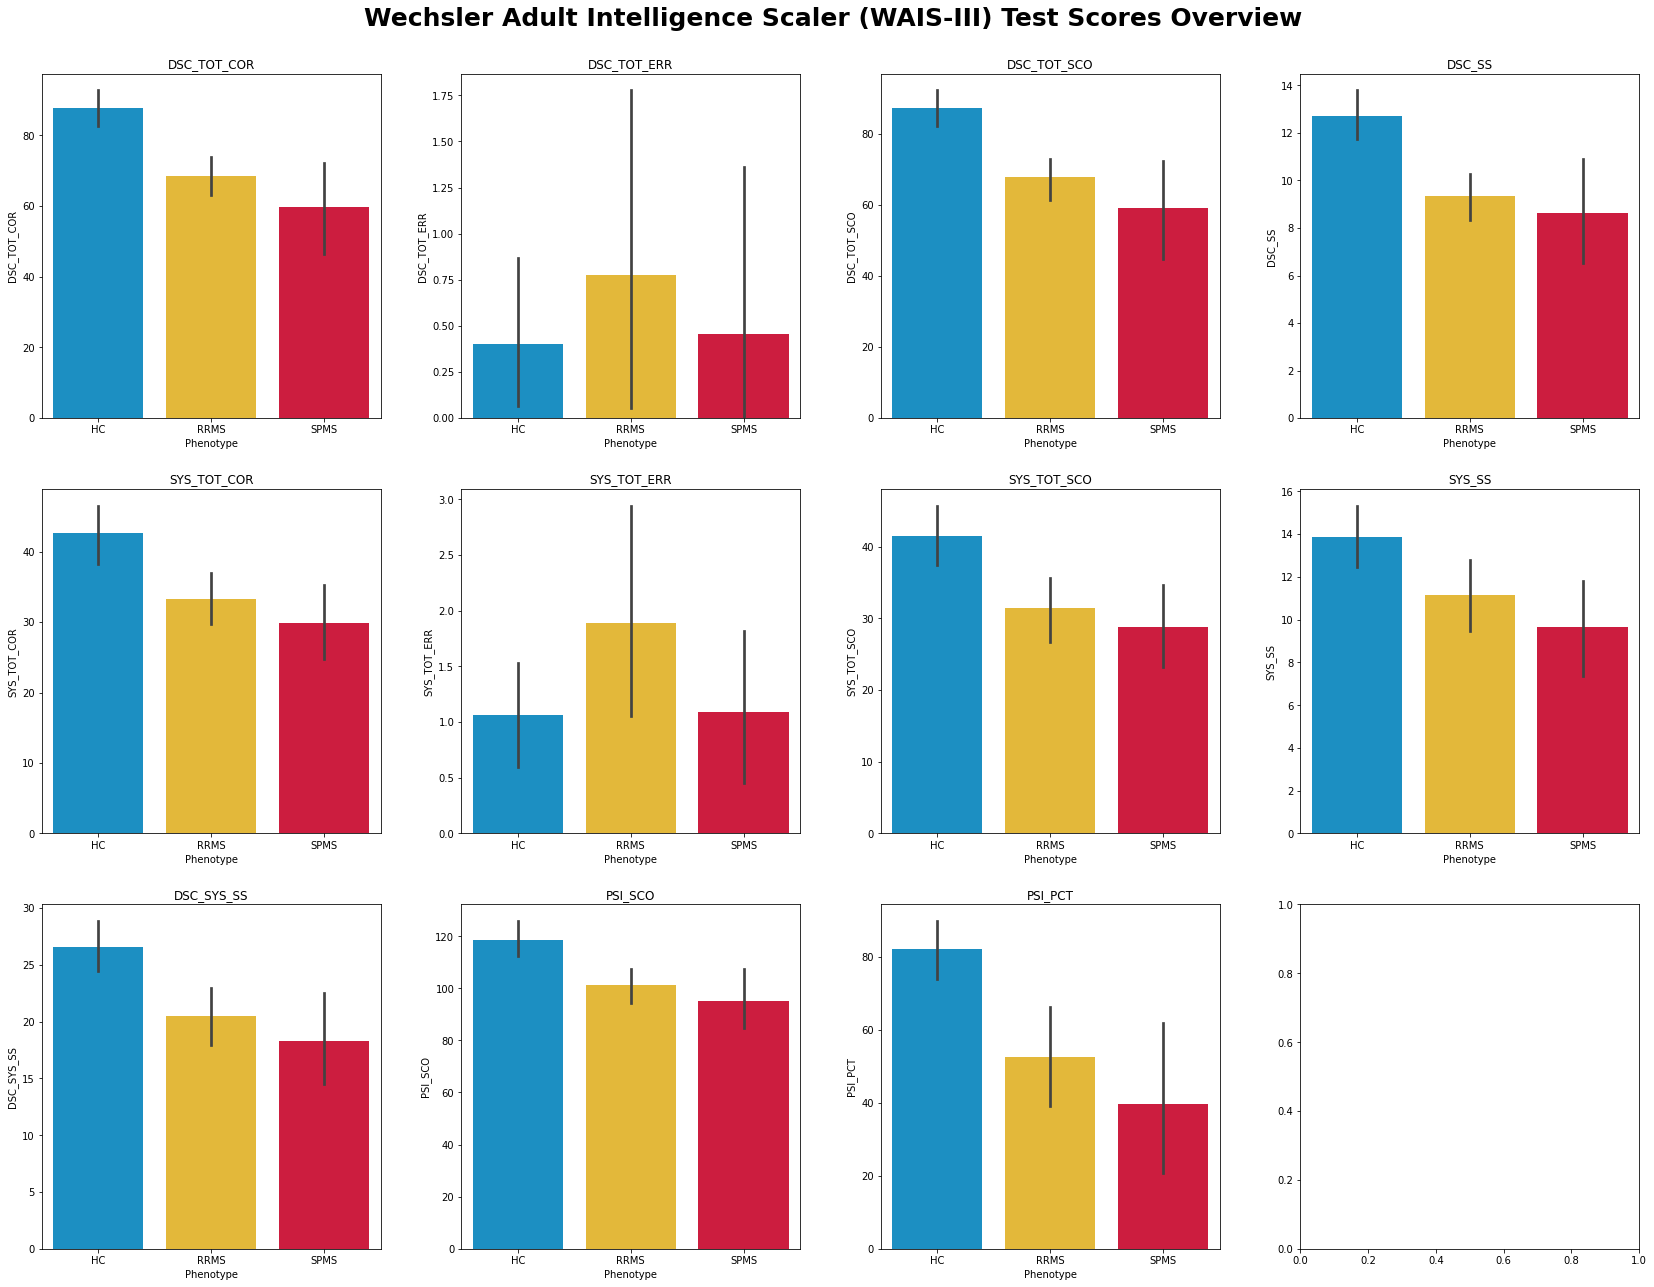

In [36]:
# WAIS3 subscores
wais3_metrics = ['DSC_TOT_COR',
'DSC_TOT_ERR',
'DSC_TOT_SCO',
'DSC_SS',
'SYS_TOT_COR',
'SYS_TOT_ERR',
'SYS_TOT_SCO',
'SYS_SS',
'DSC_SYS_SS',
'PSI_SCO',
'PSI_PCT'] 

fig, ax = plt.subplots(3, 4, figsize=(24, 18))
fig.tight_layout(pad=5)
fig.suptitle('Wechsler Adult Intelligence Scaler (WAIS-III) Test Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(wais3_metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=wais3_metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(wais3_metrics[i])
    ax[i].set_xlabel('Phenotype')


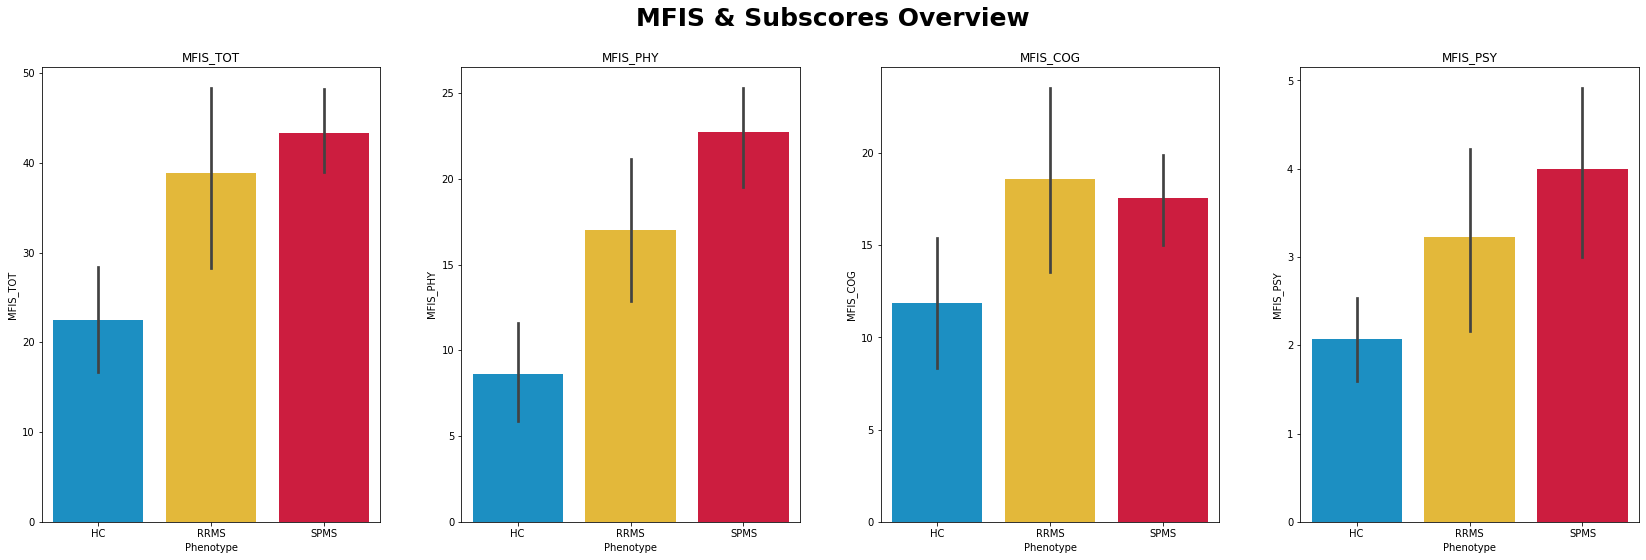

In [44]:
# MFIS subscores
MFIS_metrics = ['MFIS_TOT','MFIS_PHY','MFIS_COG','MFIS_PSY']

fig, ax = plt.subplots(1,4, figsize=(24,8))
fig.tight_layout(pad=5)
fig.suptitle('MFIS & Subscores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(MFIS_metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=MFIS_metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(MFIS_metrics[i])
    ax[i].set_xlabel('Phenotype')

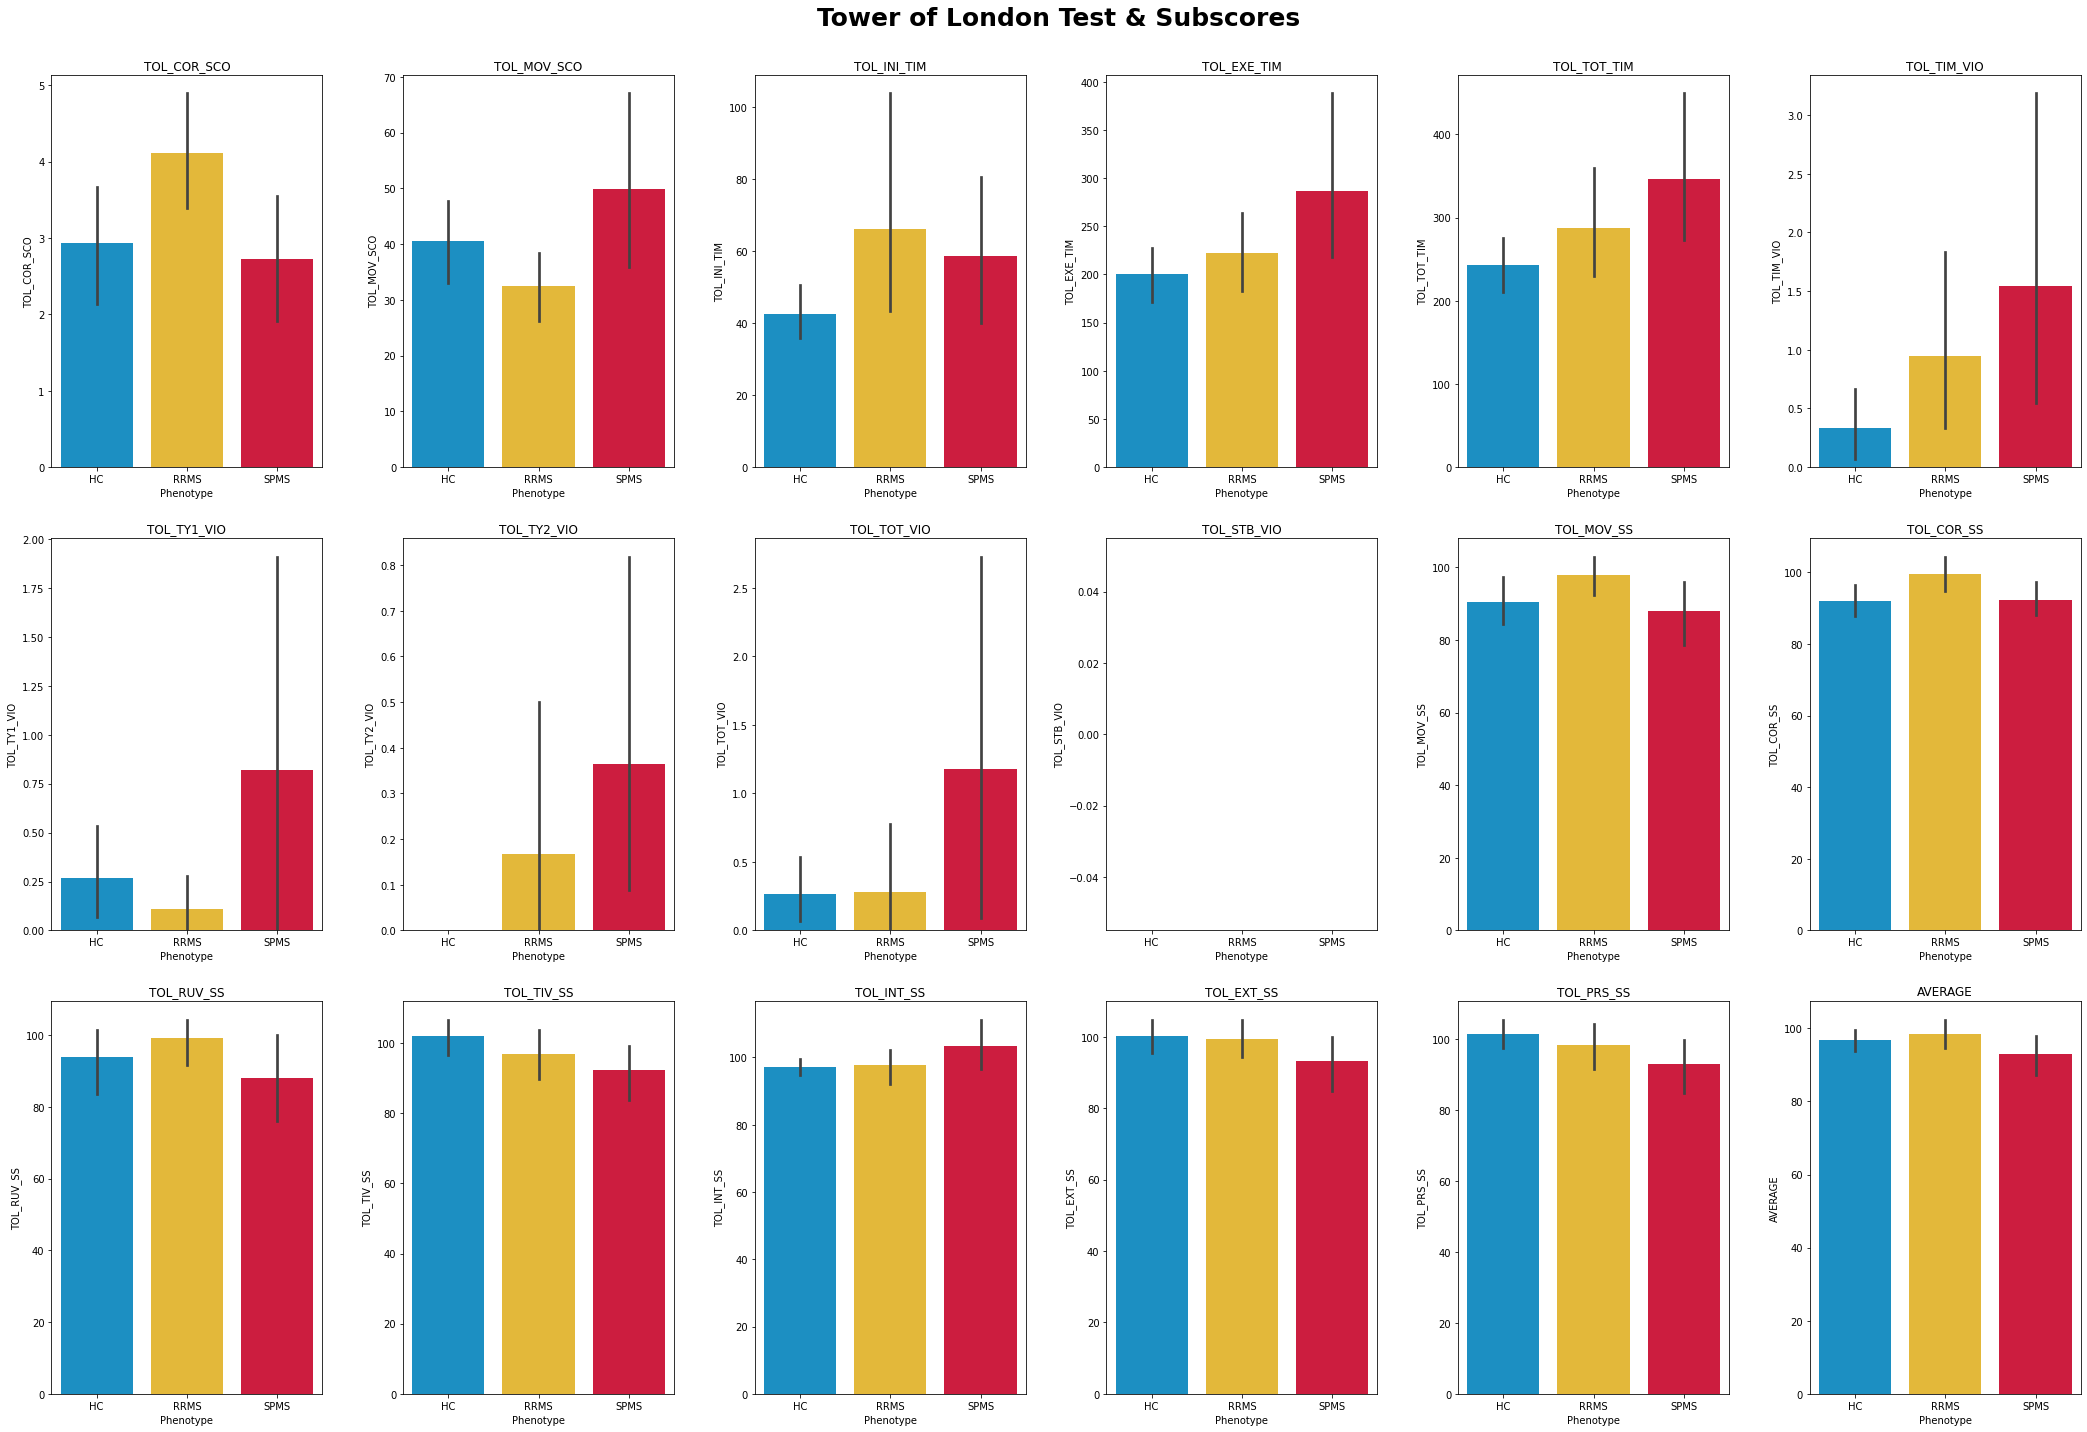

In [47]:
# TOL-2 subscores
TOL2_subscores = [
'TOL_COR_SCO',
'TOL_MOV_SCO',
'TOL_INI_TIM',
'TOL_EXE_TIM',
'TOL_TOT_TIM',
'TOL_TIM_VIO',
'TOL_TY1_VIO',
'TOL_TY2_VIO',
'TOL_TOT_VIO',
'TOL_STB_VIO',
'TOL_MOV_SS',
'TOL_COR_SS',
'TOL_RUV_SS',
'TOL_TIV_SS',
'TOL_INT_SS',
'TOL_EXT_SS',
'TOL_PRS_SS',
'AVERAGE']


fig, ax = plt.subplots(3,6, figsize=(30, 20))
fig.tight_layout(pad=5)
fig.suptitle('Tower of London Test & Subscores', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(TOL2_subscores)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=TOL2_subscores[i], data=data, order=order, palette=palette)
    ax[i].set_title(TOL2_subscores[i])
    ax[i].set_xlabel('Phenotype')

In [48]:
# EDSS and subscores
filter_ms = ['MS_TYPE$', 'EDSS', 'FSS_VISUAL',
       'FSS_BRSTEM', 'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY',
       'FSS_BOWBLAD', 'FSS_CEREBRAL']

EDSS_subscores = ['EDSS', 'FSS_VISUAL',
       'FSS_BRSTEM', 'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY',
       'FSS_BOWBLAD', 'FSS_CEREBRAL']

In [49]:
df_MS_subgroup = df_neuropsych[df_neuropsych['GROUP$'] == "MS"]

# filter edss subscores only and delete rows containing NaNs
df_MS_subgroup = df_MS_subgroup[filter_ms]

# force datatypes to numeric
df_MS_subgroup[EDSS_subscores] = df_MS_subgroup[EDSS_subscores].apply(pd.to_numeric, errors='coerce')


# drop rows with nan values
df_MS_subgroup = df_MS_subgroup.dropna()
df_MS_subgroup

,MS_TYPE$,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
0,SPMS,3.0,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000
1,SPMS,5.5,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000
2,RRMS,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,SPMS,6.5,1.000000,2.000000,5.000000,3.000000,3.000000,1.000000,1.000000
4,SPMS,4.0,0.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000
7,RRMS,1.5,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
8,RRMS,2.0,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000
9,RRMS,3.0,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000
11,RRMS,1.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
12,RRMS,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
df_MS_subgroup['MS_TYPE$'].value_counts()

RRMS    17
SPMS    11
Name: MS_TYPE$, dtype: int64

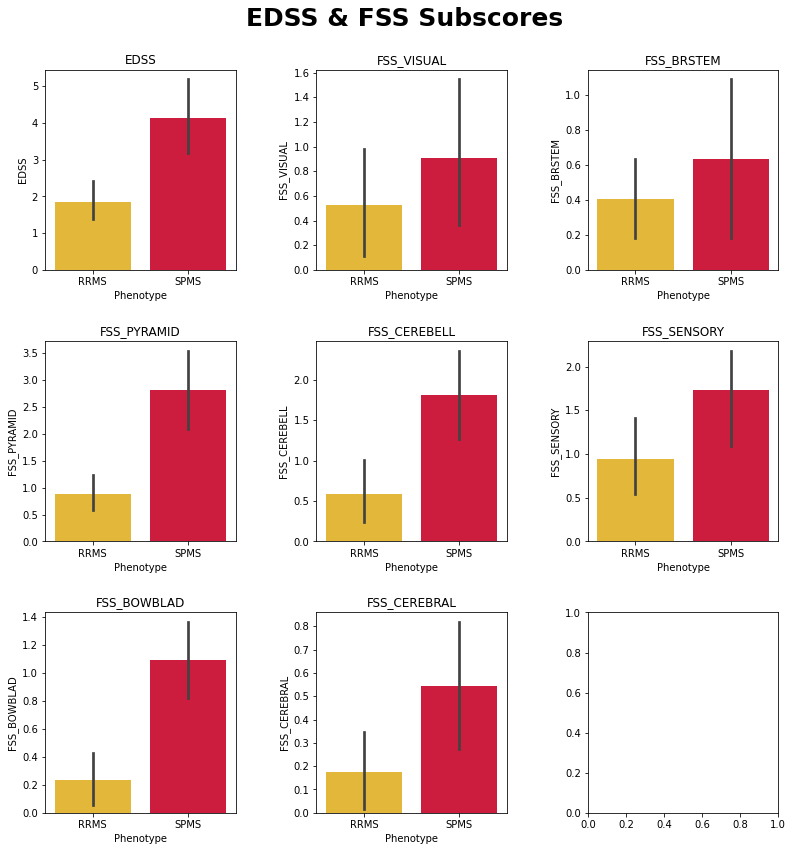

In [51]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
fig.tight_layout(pad=5)
fig.suptitle('EDSS & FSS Subscores', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(EDSS_subscores)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=EDSS_subscores[i], data=df_MS_subgroup, order=['RRMS', 'SPMS'], palette=['#FFC61E', '#E9002D'])
    ax[i].set_title(EDSS_subscores[i])
    ax[i].set_xlabel('Phenotype')

## Principal Component Analysis

### Feature Selection


# Functional Image Data 

In [ ]:
# Exploratory 